<a href="https://colab.research.google.com/github/roberto-virtual/cotacao_ibov/blob/main/ObtendoCotacaoIbov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datetime
!pip install matplot pltly
!pip install yfinance quandl



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 961 kB/s 
     |████████████████████████████████| 251 kB 22.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pltly (from versions: none)
ERROR: No matching distribution found for pltly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import yfinance as yf
import quandl


In [ ]:
ticker_ibov = ['RRRP3',
'ALPA4',
'ABEV3',
'AMER3',
'ARZZ3',
'ASAI3',
'AZUL4',
'B3SA3',
'BPAN4',
'BBSE3',
'BRML3',
'BBDC3',
'BBDC4',
'BRAP4',
'BBAS3',
'BRKM5',
'BRFS3',
'BPAC11',
'CRFB3',
'CCRO3',
'CMIG4',
'CIEL3',
'COGN3',
'CPLE6',
'CSAN3',
'CPFE3',
'CMIN3',
'CVCB3',
'CYRE3',
'DXCO3',
'ECOR3',
'ELET3',
'ELET6',
'EMBR3',
'ENBR3',
'ENGI11',
'ENEV3',
'EGIE3',
'EQTL3',
'EZTC3',
'FLRY3',
'GGBR4',
'GOAU4',
'GOLL4',
'NTCO3',
'SOMA3',
'HAPV3',
'HYPE3',
'IGTI11',
'IRBR3',
'ITSA4',
'ITUB4',
'JBSS3',
'KLBN11',
'RENT3',
'LWSA3',
'LREN3',
'MGLU3',
'MRFG3',
'CASH3',
'BEEF3',
'MRVE3',
'MULT3',
'PCAR3',
'PETR3',
'PETR4',
'PRIO3',
'PETZ3',
'POSI3',
'QUAL3',
'RADL3',
'RAIZ4',
'RDOR3',
'RAIL3',
'SBSP3',
'SANB11',
'SMTO3',
'CSNA3',
'SLCE3',
'SULA11',
'SUZB3',
'TAEE11',
'VIVT3',
'TIMS3',
'TOTS3',
'UGPA3',
'USIM5',
'VALE3',
'VIIA3',
'VBBR3',
'WEGE3',
'YDUQ3']

In [ ]:
# colocando SA no final de cada ação
ativo_SA = 0
ticker_ibov_sa = []

for i in ticker_ibov:
  ativo_SA = i+'.SA'
  ticker_ibov_sa.append(ativo_SA)



In [ ]:
# Buscando dados no Yahoo Finance

cotacao_ibov = yf.download(ticker_ibov_sa, start = "2022-01-01", period = "1d")

[*********************100%***********************]  92 of 92 completed


In [ ]:
# Pegando os nomes das colunas
# set não repete dados
set(cotacao_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [ ]:
cotacao_ibov_ajustado = yf.download(ticker_ibov_sa, start = "2022-01-01", period = "1d")['Adj Close']
cotacao_ibov_ajustado.head()

[*********************100%***********************]  92 of 92 completed


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,15.33,34.299999,30.409204,71.209702,12.617586,24.420000,10.401931,27.330168,14.716522,17.543020,...,12.238817,27.400362,13.530124,14.203058,71.410995,19.869818,4.98,45.937035,31.504591,19.849894
2022-01-04,15.31,33.310001,29.370075,69.109779,12.617586,24.400000,10.625106,27.358620,14.785285,17.658041,...,12.422932,26.294384,13.022265,14.089207,70.568710,19.752649,4.73,45.937035,31.347166,19.522371
2022-01-05,15.01,32.029999,28.056461,65.787392,11.893463,22.360001,10.401931,26.903435,14.687369,17.533186,...,12.306648,25.128622,12.677303,13.273265,71.237045,18.883650,4.57,45.879387,29.694208,18.768074
2022-01-06,14.77,32.540001,28.683859,66.990150,11.496684,23.049999,10.654216,27.121544,14.847593,17.782898,...,12.219437,25.905798,12.495242,13.292241,72.674423,18.756718,4.36,45.139549,29.684370,18.748224
2022-01-07,14.53,32.349998,27.154577,66.457787,11.268536,23.900000,10.906502,27.149994,14.909903,18.041523,...,12.045012,25.009058,12.409001,13.927916,76.904144,18.717661,4.17,44.832085,28.936604,18.668825


In [ ]:
#mapeando NaN
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import missingno as msno

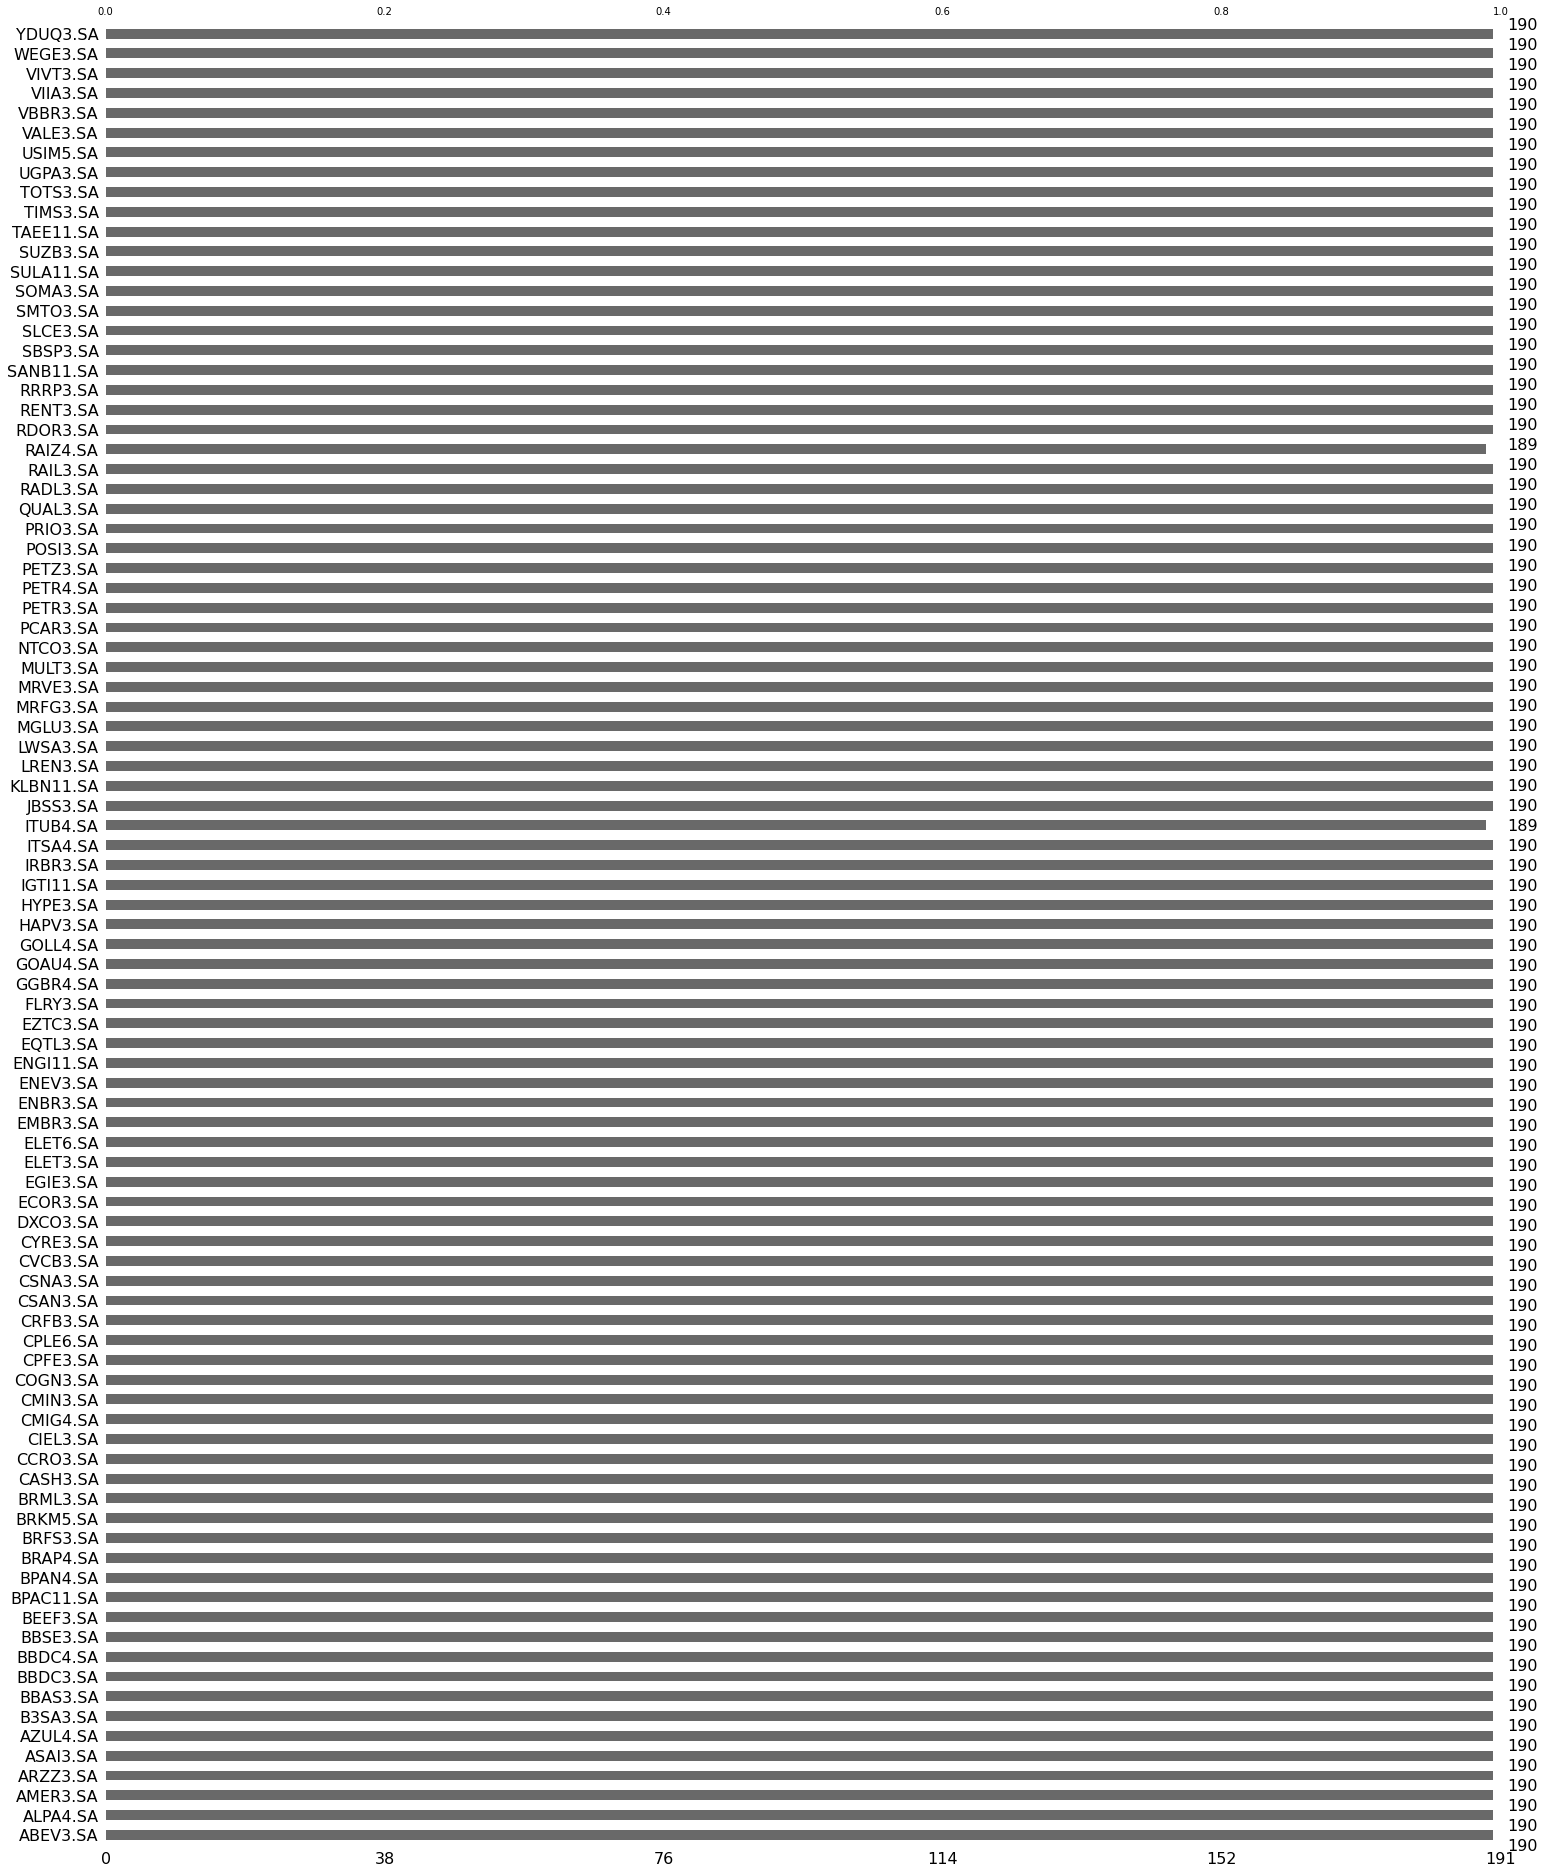

In [ ]:
msno.bar(cotacao_ibov_ajustado)

In [ ]:
#importar arquivo texto
dados_csv = pd.read_csv('Bovespa.csv')


#colocando a data como indice.
dados_csv.index = pd.to_datetime(dados_csv.Date)

dados_csv.head()#['ABCB4']-> APLICANDO FILTRO

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-05,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
2012-06-06,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2012-06-08,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
2012-06-11,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
2012-06-12,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


In [ ]:
#Mudando o data frame para poucas colunas, mudando de horizontal para vertical

cotacoes_ativos_long = pd.melt(cotacao_ibov,ignore_index= False)
cotacoes_ativos_long

,variable_0,variable_1,value
Date,,,
2022-01-03,Adj Close,ABEV3.SA,15.33
2022-01-04,Adj Close,ABEV3.SA,15.31
2022-01-05,Adj Close,ABEV3.SA,15.01
2022-01-06,Adj Close,ABEV3.SA,14.77
2022-01-07,Adj Close,ABEV3.SA,14.53
...,...,...,...
2022-09-27,Volume,YDUQ3.SA,4122200.00
2022-09-28,Volume,YDUQ3.SA,8868200.00
2022-09-29,Volume,YDUQ3.SA,7888000.00
